<a href="https://www.kaggle.com/code/lalit7881/patient-churn-prediction-in-healthcare-ml-eda?scriptVersionId=293048581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/patient-churn-prediction-dataset-for-healthcare/patient_churn_dataset.csv


## Patient Churn Prediction in Healthcare

## Description:
This dataset contains patient demographics, healthcare usage, satisfaction metrics, and engagement information to predict patient churn. Features include age, gender, state, tenure, visit history, satisfaction scores, billing details, portal usage, and referrals. The target variable, Churned, indicates whether a patient has discontinued their relationship with the healthcare provider. The dataset is useful for building machine learning models to identify patients at risk of leaving and for designing retention strategies.

## setup and dataloading

In [2]:
# Set style for beautiful visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

In [3]:
df = pd.read_csv(
    "/kaggle/input/patient-churn-prediction-dataset-for-healthcare/patient_churn_dataset.csv"
)

print("Patient Churn Prediction Dataset")
print("=" * 50)


Patient Churn Prediction Dataset


In [4]:
df.head(10)

,PatientID,Age,Gender,State,Tenure_Months,Specialty,Insurance_Type,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,...,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
0,C20000,41,Female,PA,62,Pediatrics,Medicaid,1,0,564,...,3.5,4.9,3.8,4.2,306,0,0,3,21.4,1
1,C20001,43,Female,GA,44,Internal Medicine,Self-Pay,7,4,254,...,2.6,3.1,4.7,4.3,1851,0,0,0,47.6,1
2,C20002,21,Male,MI,120,Internal Medicine,Medicaid,15,5,89,...,1.6,4.4,2.1,4.7,391,0,0,2,7.1,0
3,C20003,65,Male,FL,118,General Practice,Private,10,3,135,...,2.6,4.3,4.3,4.9,808,0,0,0,11.6,1
4,C20004,18,Female,CA,70,Cardiology,Medicaid,5,4,696,...,2.2,4.0,4.1,4.4,866,0,0,0,10.3,1
5,C20005,65,Male,MI,82,Orthopedics,Self-Pay,15,1,629,...,1.7,4.9,2.3,4.6,1548,0,1,1,5.6,0
6,C20006,82,Female,FL,56,Pediatrics,Medicare,10,1,520,...,2.9,4.7,3.2,4.5,423,0,1,2,15.8,1
7,C20007,66,Male,MI,22,General Practice,Private,7,0,178,...,2.7,4.7,2.3,4.0,1771,0,0,1,32.1,1
8,C20008,18,Female,FL,39,Orthopedics,Medicare,5,4,492,...,2.9,2.2,2.9,3.3,122,0,0,2,37.7,1
9,C20009,47,Male,NY,15,Internal Medicine,Self-Pay,2,2,298,...,4.4,1.5,2.2,4.2,1685,0,1,2,12.9,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PatientID                   2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   Gender                      2000 non-null   object 
 3   State                       2000 non-null   object 
 4   Tenure_Months               2000 non-null   int64  
 5   Specialty                   2000 non-null   object 
 6   Insurance_Type              2000 non-null   object 
 7   Visits_Last_Year            2000 non-null   int64  
 8   Missed_Appointments         2000 non-null   int64  
 9   Days_Since_Last_Visit       2000 non-null   int64  
 10  Last_Interaction_Date       2000 non-null   object 
 11  Overall_Satisfaction        2000 non-null   float64
 12  Wait_Time_Satisfaction      2000 non-null   float64
 13  Staff_Satisfaction          2000 

In [6]:
df.describe()

,Age,Tenure_Months,Visits_Last_Year,Missed_Appointments,Days_Since_Last_Visit,Overall_Satisfaction,Wait_Time_Satisfaction,Staff_Satisfaction,Provider_Rating,Avg_Out_Of_Pocket_Cost,Billing_Issues,Portal_Usage,Referrals_Made,Distance_To_Facility_Miles,Churned
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,52.856500,60.733500,7.614000,2.028000,366.130000,3.255000,3.289900,3.525900,3.736100,836.544000,0.078500,0.206000,1.483500,25.167400,0.683500
std,15.836487,35.111293,4.672143,1.699312,212.890277,1.008595,1.009062,0.871613,0.733748,589.031896,0.269024,0.404532,1.100151,13.948284,0.465227
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.500000,1.500000,2.000000,2.500000,20.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,41.000000,30.000000,4.000000,0.000000,180.000000,2.400000,2.400000,2.775000,3.100000,326.000000,0.000000,0.000000,1.000000,12.800000,0.000000
50%,54.000000,60.000000,8.000000,2.000000,363.000000,3.200000,3.300000,3.500000,3.800000,716.000000,0.000000,0.000000,1.000000,25.000000,1.000000
75%,65.000000,92.250000,12.000000,3.000000,550.250000,4.100000,4.100000,4.300000,4.400000,1368.250000,0.000000,0.000000,2.000000,37.200000,1.000000
max,90.000000,120.000000,15.000000,5.000000,730.000000,5.000000,5.000000,5.000000,5.000000,1999.000000,1.000000,1.000000,3.000000,50.000000,1.000000


In [7]:
df.dtypes

PatientID                      object
Age                             int64
Gender                         object
State                          object
Tenure_Months                   int64
Specialty                      object
Insurance_Type                 object
Visits_Last_Year                int64
Missed_Appointments             int64
Days_Since_Last_Visit           int64
Last_Interaction_Date          object
Overall_Satisfaction          float64
Wait_Time_Satisfaction        float64
Staff_Satisfaction            float64
Provider_Rating               float64
Avg_Out_Of_Pocket_Cost          int64
Billing_Issues                  int64
Portal_Usage                    int64
Referrals_Made                  int64
Distance_To_Facility_Miles    float64
Churned                         int64
dtype: object

In [8]:
df.shape

(2000, 21)

In [9]:
df.isnull().sum()

PatientID                     0
Age                           0
Gender                        0
State                         0
Tenure_Months                 0
Specialty                     0
Insurance_Type                0
Visits_Last_Year              0
Missed_Appointments           0
Days_Since_Last_Visit         0
Last_Interaction_Date         0
Overall_Satisfaction          0
Wait_Time_Satisfaction        0
Staff_Satisfaction            0
Provider_Rating               0
Avg_Out_Of_Pocket_Cost        0
Billing_Issues                0
Portal_Usage                  0
Referrals_Made                0
Distance_To_Facility_Miles    0
Churned                       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dropna(inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.columns


Index(['PatientID', 'Age', 'Gender', 'State', 'Tenure_Months', 'Specialty',
       'Insurance_Type', 'Visits_Last_Year', 'Missed_Appointments',
       'Days_Since_Last_Visit', 'Last_Interaction_Date',
       'Overall_Satisfaction', 'Wait_Time_Satisfaction', 'Staff_Satisfaction',
       'Provider_Rating', 'Avg_Out_Of_Pocket_Cost', 'Billing_Issues',
       'Portal_Usage', 'Referrals_Made', 'Distance_To_Facility_Miles',
       'Churned'],
      dtype='object')

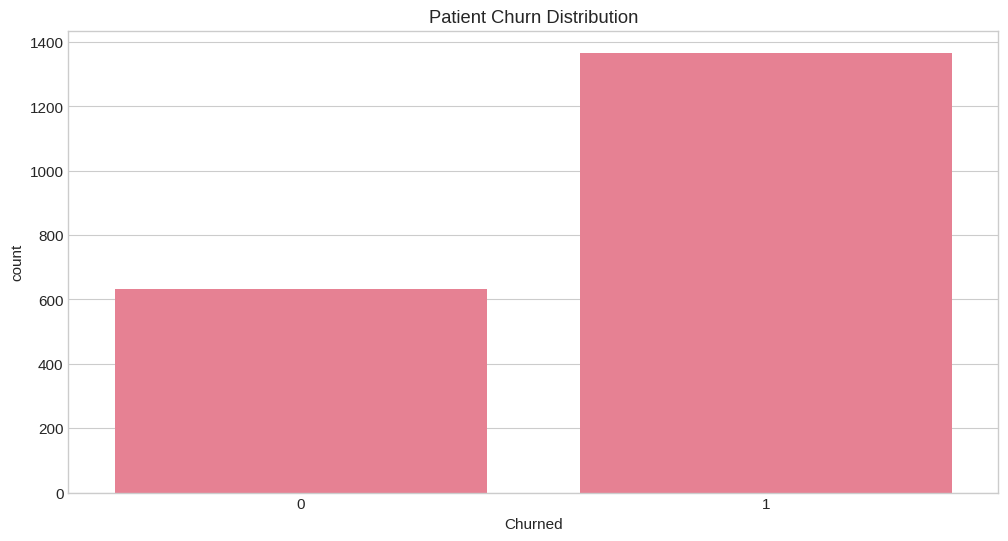

In [14]:
sns.countplot(x='Churned', data=df)
plt.title("Patient Churn Distribution")
plt.show()


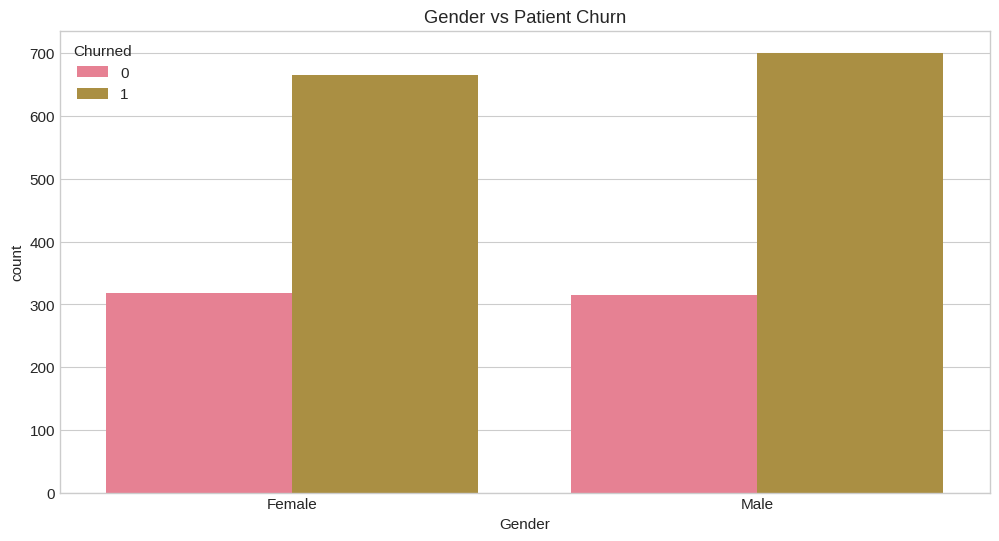

In [15]:
sns.countplot(x='Gender', hue='Churned', data=df)
plt.title("Gender vs Patient Churn")
plt.show()


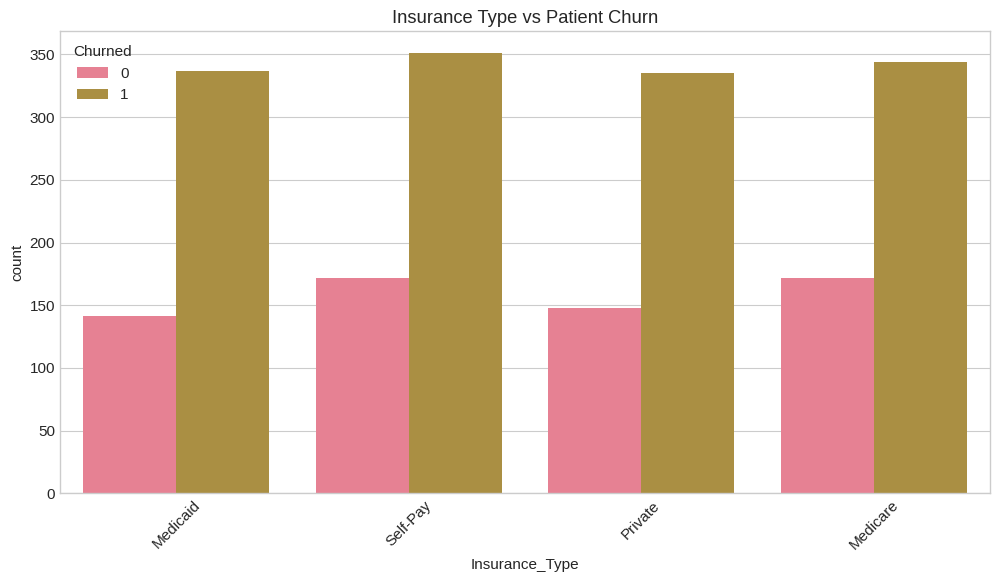

In [16]:
sns.countplot(x='Insurance_Type', hue='Churned', data=df)
plt.title("Insurance Type vs Patient Churn")
plt.xticks(rotation=45)
plt.show()


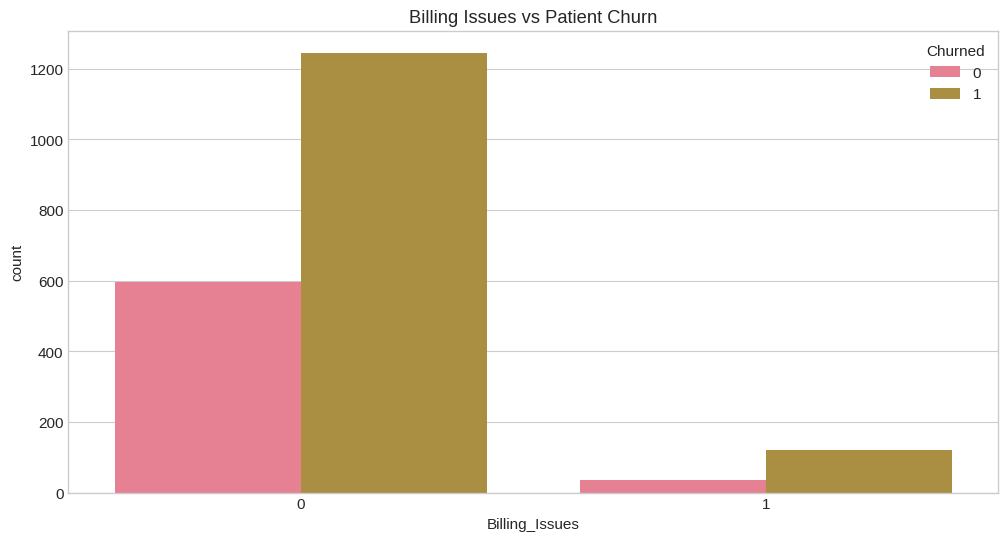

In [17]:
sns.countplot(x='Billing_Issues', hue='Churned', data=df)
plt.title("Billing Issues vs Patient Churn")
plt.show()


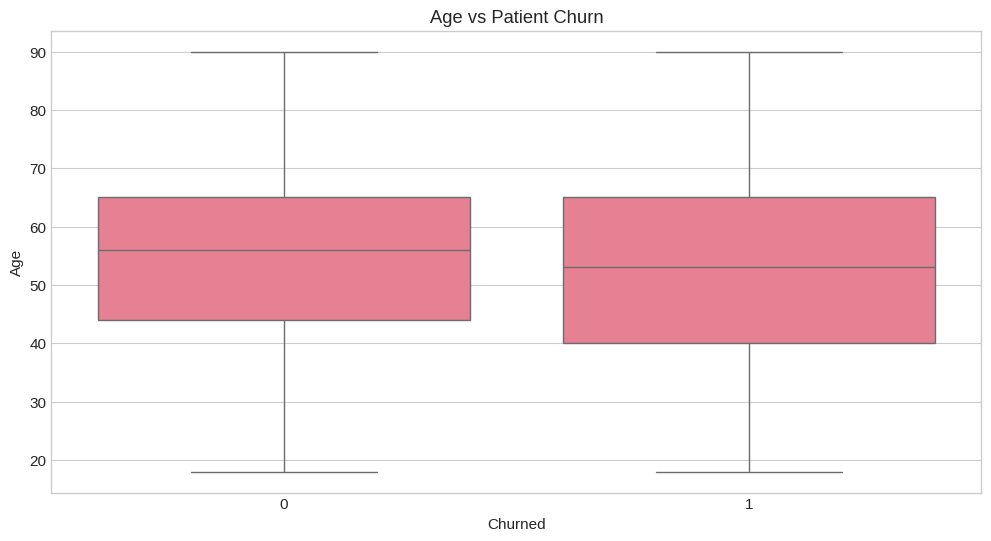

In [18]:
sns.boxplot(x='Churned', y='Age', data=df)
plt.title("Age vs Patient Churn")
plt.show()


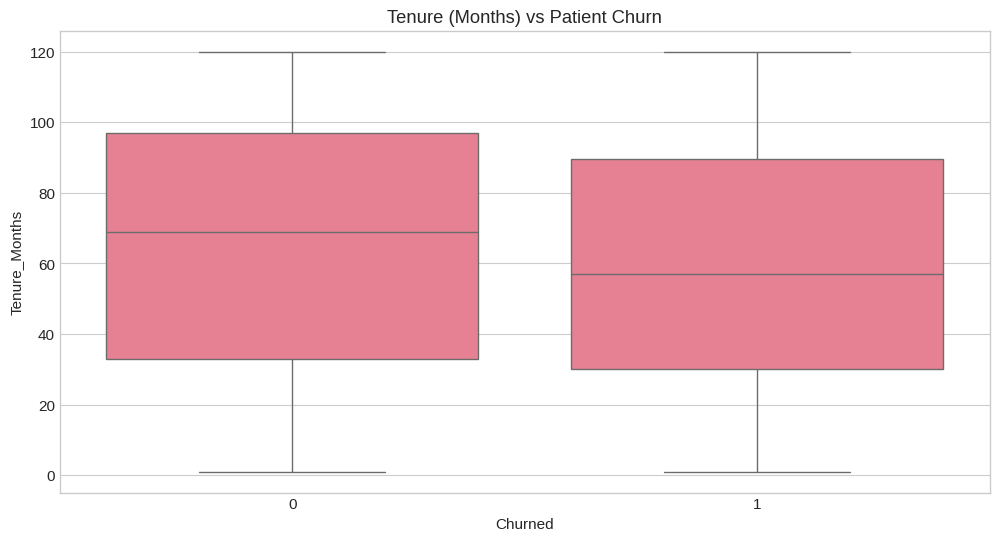

In [19]:
sns.boxplot(x='Churned', y='Tenure_Months', data=df)
plt.title("Tenure (Months) vs Patient Churn")
plt.show()


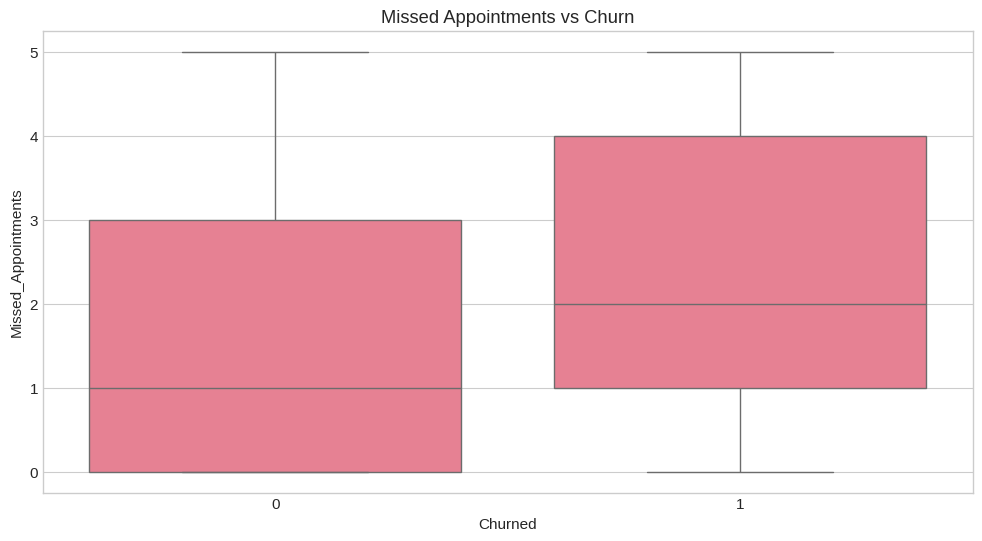

In [20]:
sns.boxplot(x='Churned', y='Missed_Appointments', data=df)
plt.title("Missed Appointments vs Churn")
plt.show()


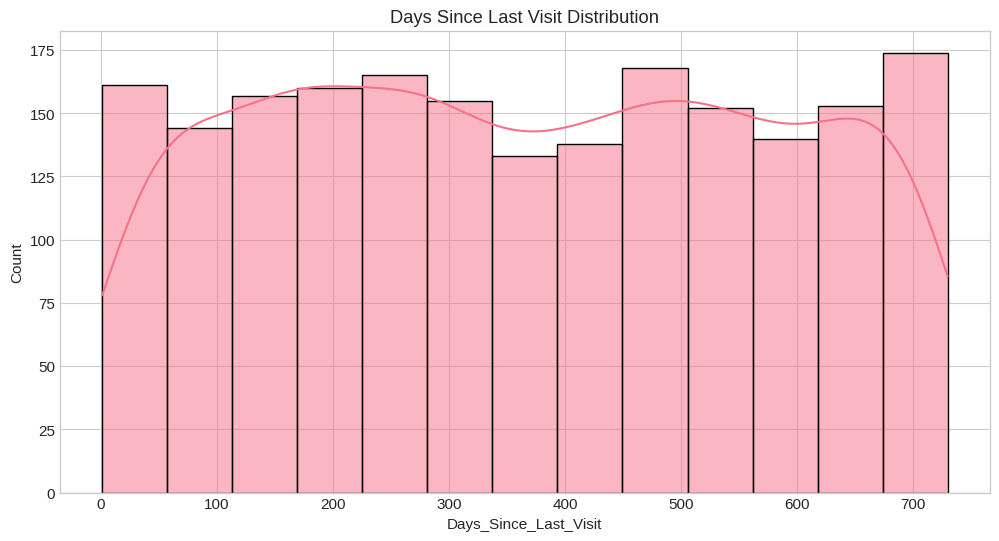

In [21]:
sns.histplot(df['Days_Since_Last_Visit'], kde=True)
plt.title("Days Since Last Visit Distribution")
plt.show()


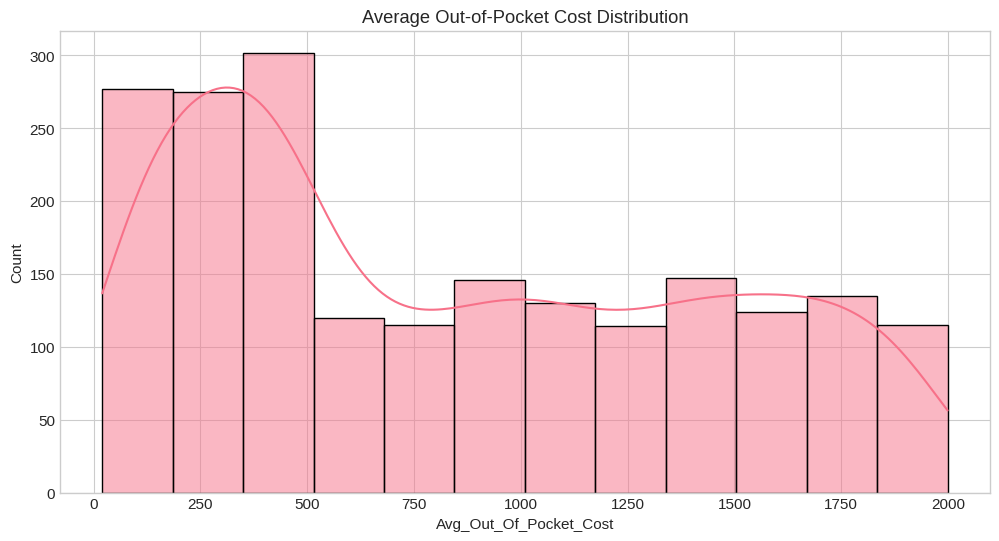

In [22]:
sns.histplot(df['Avg_Out_Of_Pocket_Cost'], kde=True)
plt.title("Average Out-of-Pocket Cost Distribution")
plt.show()


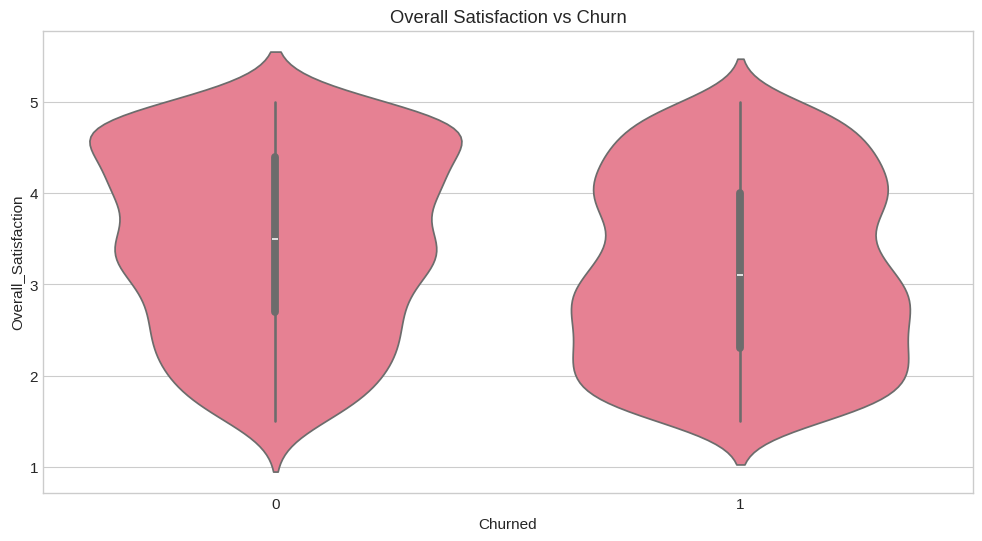

In [23]:
sns.violinplot(x='Churned', y='Overall_Satisfaction', data=df)
plt.title("Overall Satisfaction vs Churn")
plt.show()


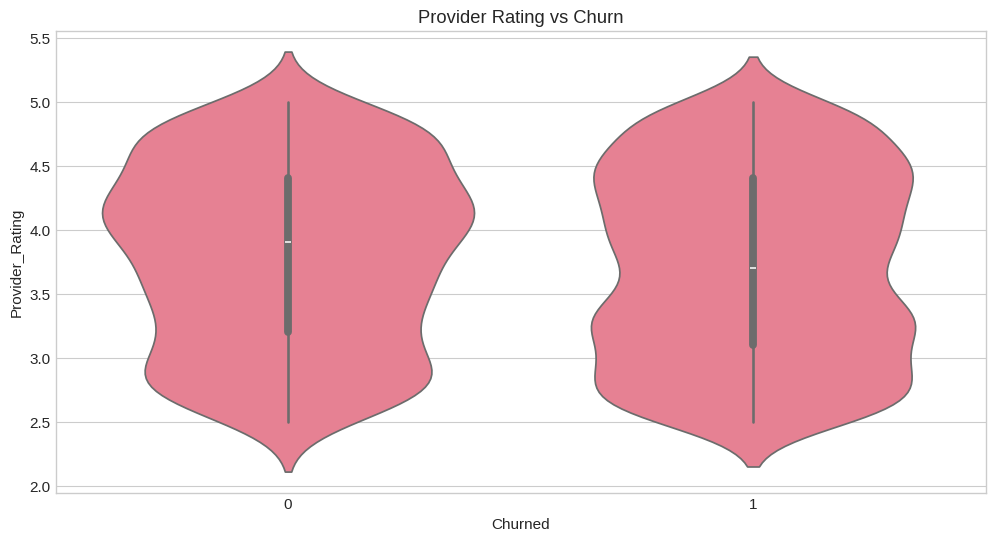

In [24]:
sns.violinplot(x='Churned', y='Provider_Rating', data=df)
plt.title("Provider Rating vs Churn")
plt.show()


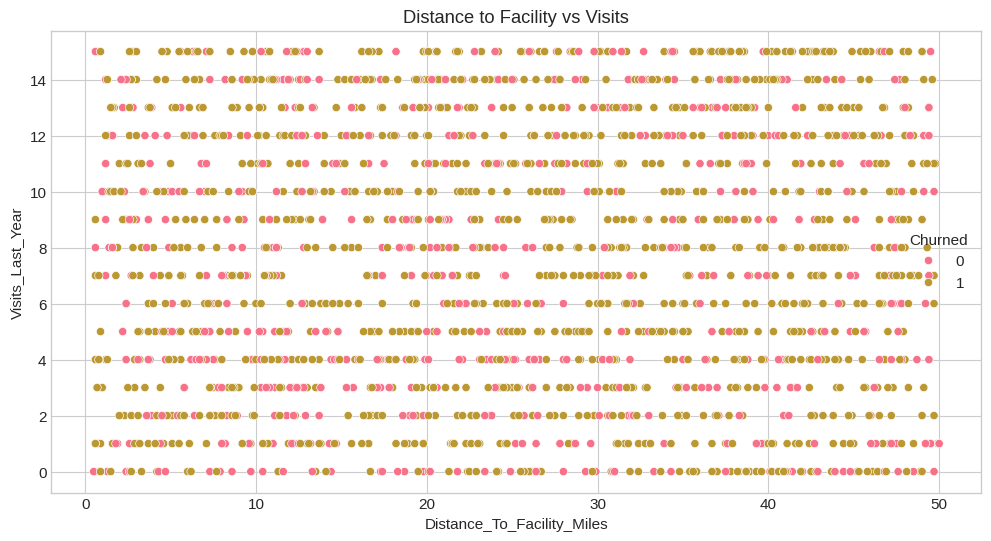

In [25]:
sns.scatterplot(
    x='Distance_To_Facility_Miles',
    y='Visits_Last_Year',
    hue='Churned',
    data=df
)
plt.title("Distance to Facility vs Visits")
plt.show()


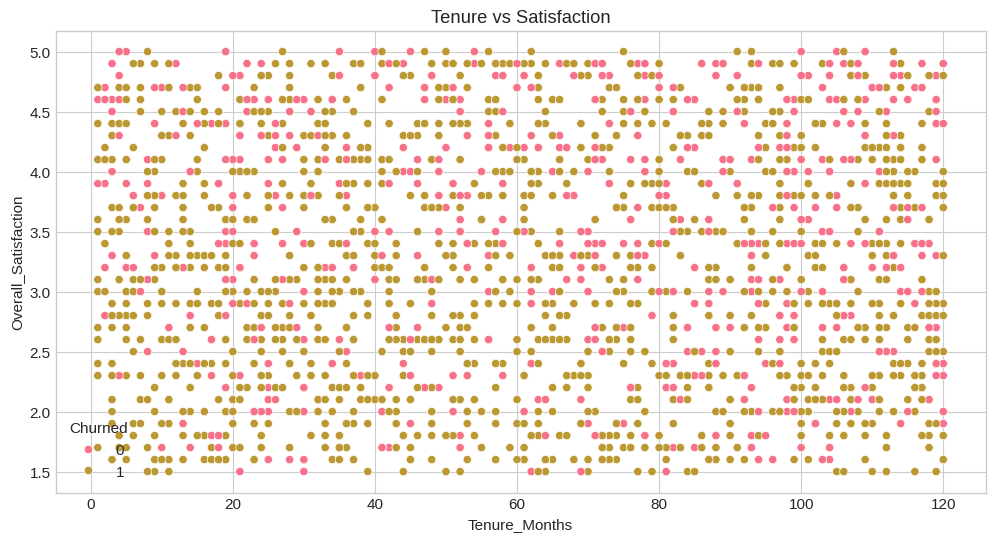

In [26]:
sns.scatterplot(
    x='Tenure_Months',
    y='Overall_Satisfaction',
    hue='Churned',
    data=df
)
plt.title("Tenure vs Satisfaction")
plt.show()


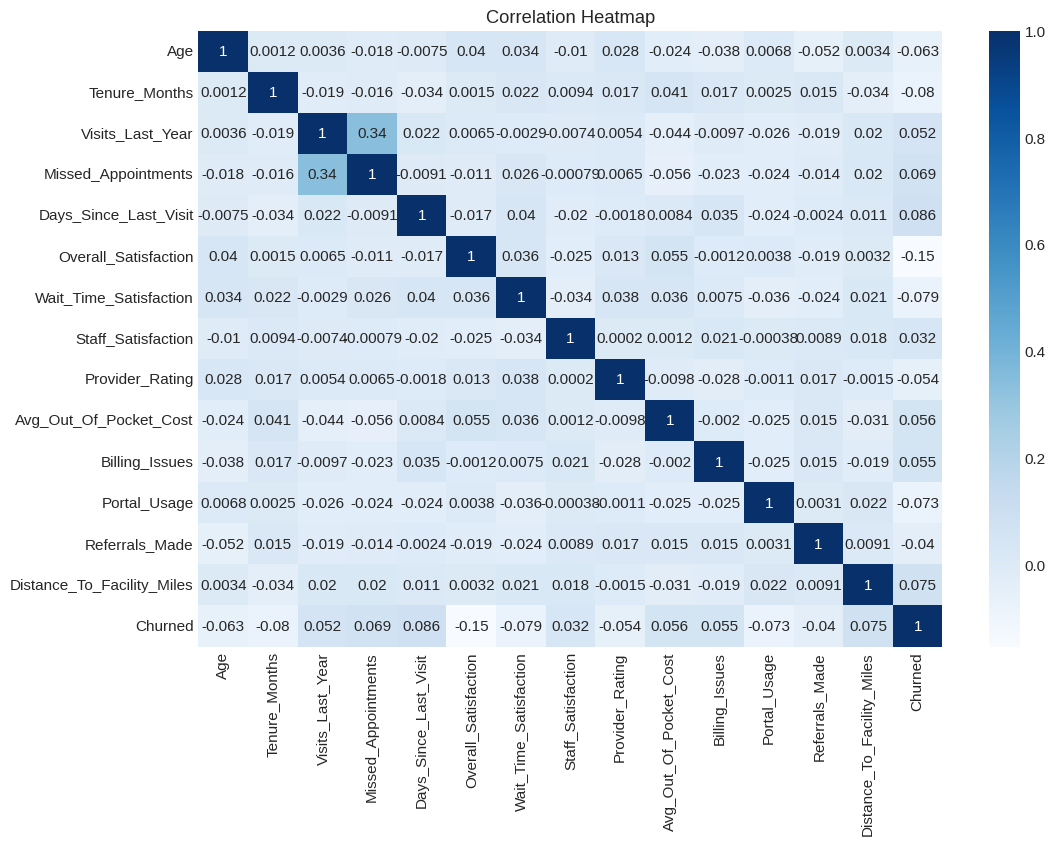

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap='Blues'
)
plt.title("Correlation Heatmap")
plt.show()


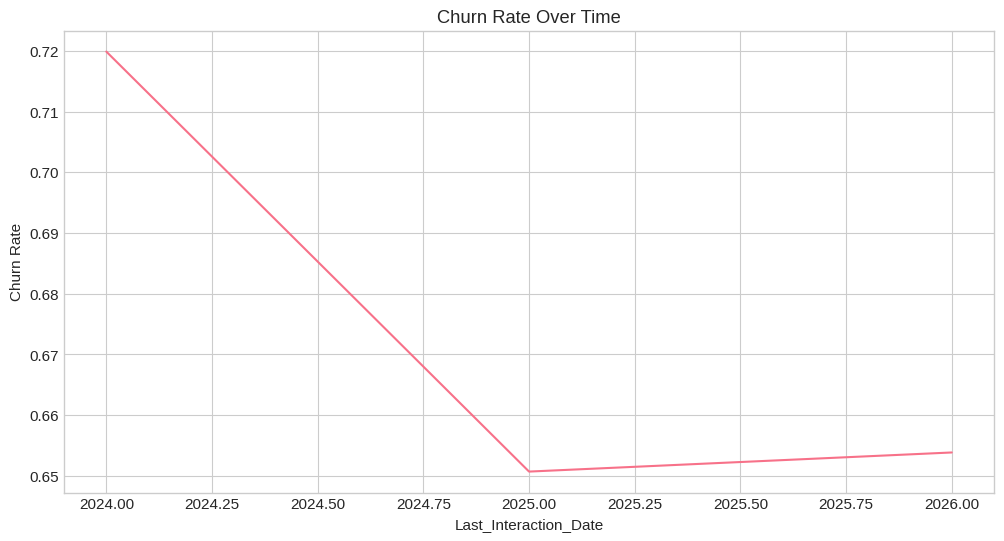

In [28]:
df['Last_Interaction_Date'] = pd.to_datetime(df['Last_Interaction_Date'])

df.groupby(df['Last_Interaction_Date'].dt.year)['Churned'].mean().plot()
plt.title("Churn Rate Over Time")
plt.ylabel("Churn Rate")
plt.show()


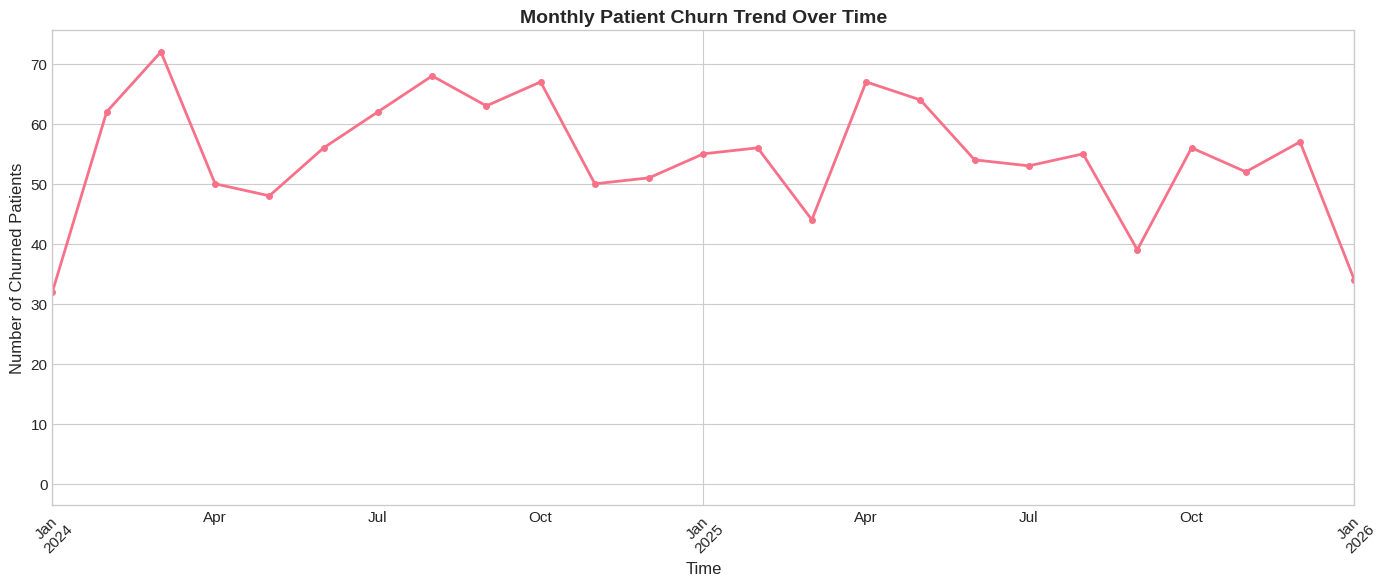

In [29]:
# Ensure date column is datetime
df['Last_Interaction_Date'] = pd.to_datetime(df['Last_Interaction_Date'])

# Create year-month period
df['year_month'] = df['Last_Interaction_Date'].dt.to_period('M')

# Monthly churn count
monthly_churn = df[df['Churned'] == 1].groupby('year_month').size()

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

monthly_churn.plot(
    ax=ax,
    linewidth=2,
    marker='o',
    markersize=4
)

ax.fill_between(
    range(len(monthly_churn)),
    monthly_churn.values,
    alpha=0.3
)

ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of Churned Patients', fontsize=12)
ax.set_title(
    'Monthly Patient Churn Trend Over Time',
    fontsize=14,
    fontweight='bold'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [31]:
print(df.columns.tolist())

['PatientID', 'Age', 'Gender', 'State', 'Tenure_Months', 'Specialty', 'Insurance_Type', 'Visits_Last_Year', 'Missed_Appointments', 'Days_Since_Last_Visit', 'Last_Interaction_Date', 'Overall_Satisfaction', 'Wait_Time_Satisfaction', 'Staff_Satisfaction', 'Provider_Rating', 'Avg_Out_Of_Pocket_Cost', 'Billing_Issues', 'Portal_Usage', 'Referrals_Made', 'Distance_To_Facility_Miles', 'Churned', 'year_month']


In [32]:
features = [
    'Age', 'Gender', 'State', 'Tenure_Months', 'Specialty', 
    'Insurance_Type', 'Visits_Last_Year', 'Missed_Appointments', 
    'Days_Since_Last_Visit', 'Overall_Satisfaction', 'Wait_Time_Satisfaction', 
    'Staff_Satisfaction', 'Provider_Rating', 'Avg_Out_Of_Pocket_Cost', 
    'Billing_Issues', 'Portal_Usage', 'Referrals_Made', 'Distance_To_Facility_Miles'
]

target = 'Churned'

df_model = df[features + [target]].copy()


In [33]:
label_encoders = {}

categorical_cols = df_model.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


In [34]:
X = df_model.drop(target, axis=1)
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
results = {}


In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)

results['Logistic Regression'] = accuracy_score(y_test, pred_lr) * 100


In [38]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

results['Decision Tree'] = accuracy_score(y_test, pred_dt) * 100


In [39]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

results['Random Forest'] = accuracy_score(y_test, pred_rf) * 100


In [40]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

results['Gradient Boosting'] = accuracy_score(y_test, pred_gb) * 100


In [41]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)

results['KNN'] = accuracy_score(y_test, pred_knn) * 100


In [42]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
pred_svm = svm.predict(X_test_scaled)

results['SVM'] = accuracy_score(y_test, pred_svm) * 100


In [43]:
for model, acc in results.items():
    print(f"{model} Accuracy: {acc:.2f}%")


Logistic Regression Accuracy: 66.25%
Decision Tree Accuracy: 58.00%
Random Forest Accuracy: 67.50%
Gradient Boosting Accuracy: 65.50%
KNN Accuracy: 64.75%
SVM Accuracy: 67.50%


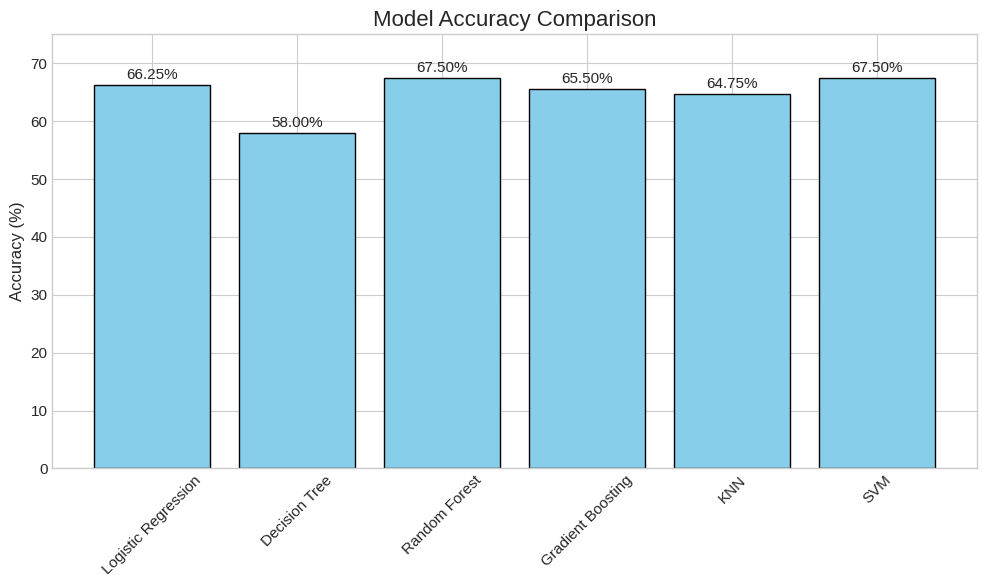

In [44]:
# Model names and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'SVM']
accuracies = [66.25, 58.00, 67.50, 65.50, 64.75, 67.50]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')

# Add accuracy labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Thank you...pls upvote!!!!!